# Regression linéaire au sens des moindres carrés




Imaginons que nous souhaitions à partir des données ($x_i$ et $y_i$), trouver la fonction qui a permis de générer ces données.

Il faut d'abord une fonction pour générer les valeurs $y_i$ à partir de $x_i$. 

Voir le code ci-dessous pour la création de la fonction $y=2x+3$.

In [1]:
def mafonction(x):
  y=2*x+3
  return y

mafonction(1)

5

Ensuite, il nous suffit de créer les $x_i$. Nous allosn en créer $M=10$.

In [2]:
import numpy as np
M=10 #nombres d'échantillons ou d'individus ou variables explicatives
X=np.zeros((M,1)) # les échantillons ou individus ou variables explicatives
for i in range(0,M):
           X[i,0]=i
print(X)



[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]
 [9.]]


Finalement, nous créons les $y_i$ associés aux $x_i$.

In [3]:
Y=np.zeros((M,1)) # les prédictions ou variables expliquées
for i in range(0,M):
           Y[i,0]=mafonction(i)
print(Y)

[[ 3.]
 [ 5.]
 [ 7.]
 [ 9.]
 [11.]
 [13.]
 [15.]
 [17.]
 [19.]
 [21.]]


Nous pouvons affichier $Y=f(X)$

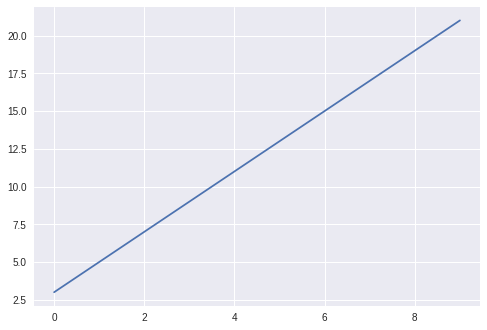

In [4]:
import matplotlib.pyplot as plt

plt.plot(X,Y)

On veut, à partir des echantillons X et Y, trouver le coefficient directeur (a) et l'ordonnée à l'origine (b) de la droite liant ces 2 variables. 

On veut trouver $\widehat{Y_{i,0}}=a \times X_{i,0} + b$.

A la place de $a$ et $b$, nous utiliserons $W_0$ et $W_1$:

$$\widehat{Y_{i,0}}=W_0 \times X_{i,0} + W_1$$


Pour des raisons d'écriture et faciliter les calculs par la suite, nous allons considérer que l'ordonnée à l'origine dépend des données (X) mais nous imposerons que X_{i,1} soit toujours 1 (voir ci-dessous) :
$$\widehat{Y_{i,0}}=W_0 \times X_{i,0} + 1 \times W_1=W_0 \times X_{i,0} + X_{i,1} \times W_1$$


In [5]:
X=np.zeros((M,2)) # les échantillons ont maintenant 2 colonnes
for i in range(0,M):
           X[i,0]=i 
           X[i,1]=1 #toujours 1
print(X)

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]
 [6. 1.]
 [7. 1.]
 [8. 1.]
 [9. 1.]]


La prédiction $\widehat{Y_{i,0}}$ peut maintenant s'écrire comme le produit scalaire du vecteur $X_i$ et $W$

$$\widehat{Y_{i,0}}=W_0 \times X_{i,0} + X_{i,1} \times W_1=X_i.W$$


# Le problème

Le problème est donc de trouver $W_0$ et $W_1$ tel que la prédiction ($\widehat{Y_{i,0}}$) soit proche de la valeur désirée ($Y_{i,0}$). Autrement dit, il faut minimiser l'écart (ou l'erreur) entre $\widehat{Y_{i,0}}$ et $Y_{i,0}$.

---

**Le problème : **
$$ \min_W \dfrac{1}{2}L(X,Y;W)$$

Avec L : 
$$L(X,Y;W)=\sum_i^M (Y_i- \widehat{Y}_i)^2$$
La fonction $L$ consiste à calculer la somme des erreurs au carrè. 

Cela peut se ré-écrire à l'aide de la norme L2 élevée au carré.
$$L(X,Y;W)=||Y-\widehat{Y}||^2_2$$

$$L(X,Y;W)=||Y-XW||^2_2=(Y-XW)^2=(Y-XW)^T(Y-XW)$$
On développe L :
$$L(X,Y;W)=Y^TY-W^TX^TY-Y^TXW+W^TX^TXW$$
$$L(X,Y;W)=Y^TY-2W^TX^TY+W^TX^TXW$$


Pourquoi $\dfrac{1}{2}$ devant L dans le problème ?


Cela va simplifier les calculs par la suite. Par forcément ici mais par la suite ... 



# Résolution  Analytique

On veut trouver W qui minimise la fonction L alors on dérive et l'on trouve où la dérivée s'annule.
$$\dfrac{\partial L}{\partial W} = 0 $$ 
**Dérivée partielle de L**

La dérivée partielle de L est simple il s'agit de dériver un polynome de degré 2.
$$\dfrac{\partial L}{\partial W} = -2X^TY+2X^TXW $$ 
Comme on a multiplié par $\dfrac{1}{2}$ alors on peut écrire :
$$\dfrac{\partial L}{\partial W} = -X^TY+X^TXW $$ 
$$\dfrac{\partial L}{\partial W} = X^T(XW-Y) $$ 

**Trouver W**
$$\dfrac{\partial L}{\partial W} = 0 $$ 
$$\dfrac{\partial L}{\partial W} = -X^TY+X^TXW =0$$ 


```
Résultat : 
```
$$W=(X^TX)^{-1}X^TY$$


Maintenant on peut calculer W en python :


# Implémentation

In [6]:
#On calcule W
XT= X.transpose() #Transposé de X
prodX =XT.dot(X) #Produit matriciel
invprodX=np.linalg.inv(prodX) #inversion de matrice
prodxx=invprodX.dot(XT)
W =prodxx.dot(Y)
print(W)


[[2.]
 [3.]]


On peut maintenant calculer la prédiction ($\widehat{Y}$):
$$\widehat{Y_{i,0}}=X_{i,0}.W$$
Le vecteur de prédictions pour tous les echantillons s'écrit:
$$\widehat{Y}=X.W$$



In [7]:
Ypred=X.dot(W)
print(Ypred)

[[ 3.]
 [ 5.]
 [ 7.]
 [ 9.]
 [11.]
 [13.]
 [15.]
 [17.]
 [19.]
 [21.]]


On peut calculer l'erreur entre la valeur réelle et la prédiction:
$$L(X,Y;W)=\dfrac{1}{2}\sum_i^M (Y_i- \widehat{Y}_i)^2$$
$$L(X,Y;W)=\dfrac{1}{2}||Y-\widehat{Y}||^2_2$$


In [8]:
vecerreur=Y-Ypred #vecteur d'erreurs
normeL2=np.linalg.norm(vecerreur,2) #norme du vecteur
erreur=0.5*(normeL2**2) # exponentiation au carré
print(erreur)


0.0


On peut maintenant afficher $Y$ et $\widehat{Y}$:

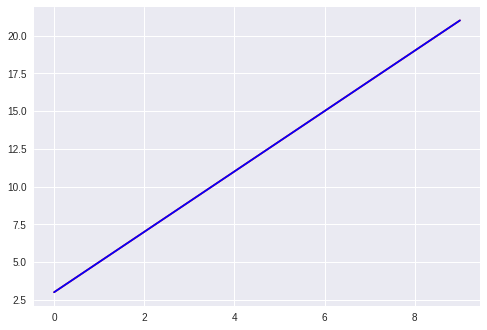

In [9]:
plt.plot(X[:,0],Y,'red')
plt.plot(X[:,0],Ypred,'blue')

# Conclusion
Voilà, nous avons construit une fonction mathématique qui modélise les données d'entrées (X et Y). 

Nous avons trouvé 
$$W_0=2 \text{ et } W_1=3$$
Nous avons retrouvé la fonction 2x+3 qui nous avait servi à générer nos données. 

**Ce qu'il fallait démontrer**

# A faire par les étudiants
Remplacer la fonction "mafonction" par la fonction mathématique $2x+3+Random$ et recalculer $W$ et l'erreur.
Remplacer la fonction "mafonction" par la fonction mathématique $2x^2+3$ et recalculer $W$ et l'erreur. Conclure sur la limite du modèle linéaire.


In [0]:
#à faire par les étudiants

# Résolution itérative
La résolution analytique peut être délicate parfois car elle impose d'inverser la matrice X qui peut être de grande taille.


Une résolution approchée peut être interessante.

Nous allons voir la résolution par descente de gradient.

Un gradient n'est rien d'autre qu'une dérivée à plusieurs dimensions, nous avions calculué le gradient de notre fonction d'erreur ($L$) par rapport à $W$ :

$$\dfrac{\partial L}{\partial W} = X^T(XW-Y) $$ 
L'algorithme de la descente de gradient cherche à diminiuer le gradient progressivement jusqu'à trouver où le gradient s'annule. Pour diminiuer le gradient il suffit de modifier $W$ dans le sens opposé du gradient.
$$W^{t+1}=W^{t}-\alpha. \dfrac{\partial L}{\partial W}$$

$W^{t+1}$ est la nouvelle valeur de $W$

$\alpha$ appelé pas de gradient ou pas d'apprentissage, est un réel représentant la vitesse à la quelle l'algorithme descend la pente du gradient (par exemple : $\alpha$=0.001)



# Algorithme de la descente de gradient

[texte du lien](https://www.overleaf.com/15483446nvydjgtwbngg#/58736810/)

![title](http://romain.raveaux.free.fr/gradientdescentematrix.PNG)




In [11]:

nbiter=20
alpha=0.001
W=np.zeros((2,1))
for t in range(0,nbiter):
  ecart=X.dot(W)-Y
  normeL2=np.linalg.norm(ecart,2) #norme du vecteur
  erreur=0.5*(normeL2**2) # exponentiation au carré
  print(erreur)
  XT=X.transpose()
  gradW=XT.dot(ecart) #calcul du grdient
  W=W-(alpha*gradW)# mise à jour des poids
  


884.9999999999997
448.2800625000001
229.44959485781254
119.78502295311817
64.81428040396605
37.24608206917567
23.407102930512803
16.44681074870201
12.932990045358762
11.146050929990766
10.22445342895388
9.736552852818027
9.466088202287109
9.304708791775882
9.198128550802515
9.119148558904447
9.054140949796151
8.9962771540303
8.942135151701102
8.889999657502557


[[2.39162151]
 [0.52881606]]
8.839010489107693


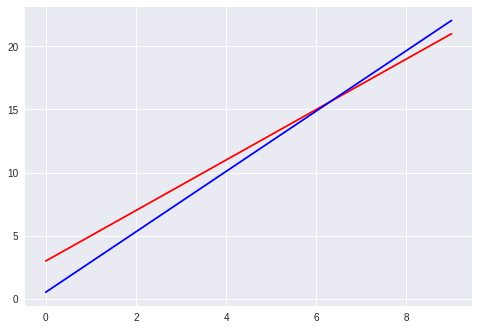

In [12]:
print(W)
Ypred=X.dot(W)
vecerreur=Y-Ypred #vecteur d'erreurs
normeL2=np.linalg.norm(vecerreur,2) #norme du vecteur
erreur=0.5*(normeL2**2) # exponentiation au carré
print(erreur)
plt.plot(X[:,0],Y,'red')
plt.plot(X[:,0],Ypred,'blue')

# A faire par les étudiants
Jouer avec $\alpha$ et $nbiter$ et regarder l'impact sur l'erreur

# Facultatif : Version non matricielle de  l'algorithme de la descente de gradient

![Texte alternatif…](http://romain.raveaux.free.fr/gradientdescenteneurone.PNG)
  

In [0]:
from random import *

def erreur (pred, y):
    return ((y-pred)**2)*0.5

def derivpartielle (prediction,y,z,x):
    return -1*(y-prediction)*x


def gradient (X,Y,W,pas,nbiter,M) :
    
    indexes = [i for i in range (0,M)]  # create a list of indexes
    shuffle(indexes)
    for t in range (0,nbiter):
        sumerreur=0
        grad0=0
        grad1=0
        for i in indexes:
            x0=X[i,0]
            x1=X[i,1]
            w0=W[0,0]
            w1=W[1,0]
            
            y=Y[i,0]
            z=x0*w0+x1*w1 #équivalent à z=X[i].dot(W) utilse si X[i] est un grand vecteur
            prediction=z
            grad0=derivpartielle(prediction,y,z,x0)
            grad1=derivpartielle(prediction,y,z,x1)

            W[0,0] = w0 -pas*grad0
            W[1,0] = w1 -pas*grad1
            

            err=erreur(prediction,y)
            sumerreur+=err

        
        print('Itération numéro ',t)
        print('Erreur : ',sumerreur)
    return W, sumerreur


In [27]:
W=np.zeros((2,1))
pas=0.01
nbiter=20
print('Pas :',pas)
print('Nombre itération : ',nbiter)
W, error =gradient(X,Y,W,pas,nbiter,M)

Pas : 0.01
Nombre itération :  20
Itération numéro  0
Erreur :  [198.42109418]
Itération numéro  1
Erreur :  [10.44156255]
Itération numéro  2
Erreur :  [9.78554002]
Itération numéro  3
Erreur :  [9.21527162]
Itération numéro  4
Erreur :  [8.67851162]
Itération numéro  5
Erreur :  [8.17301892]
Itération numéro  6
Erreur :  [7.69696943]
Itération numéro  7
Erreur :  [7.24864813]
Itération numéro  8
Erreur :  [6.82643997]
Itération numéro  9
Erreur :  [6.42882395]
Itération numéro  10
Erreur :  [6.05436765]
Itération numéro  11
Erreur :  [5.70172211]
Itération numéro  12
Erreur :  [5.36961693]
Itération numéro  13
Erreur :  [5.0568557]
Itération numéro  14
Erreur :  [4.76231171]
Itération numéro  15
Erreur :  [4.48492387]
Itération numéro  16
Erreur :  [4.22369289]
Itération numéro  17
Erreur :  [3.97767769]
Itération numéro  18
Erreur :  [3.74599201]
Itération numéro  19
Erreur :  [3.5278012]
